# EDA for Seattle Public Library Checkout Records
### continued from part 2
Dataset: The library checkouts for the entire Seattle Public Library system in 2016 merged with the library catalogue information

Source: https://www.kaggle.com/seattle-public-library/seattle-library-checkout-records

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# style parameters
sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Load Data

In [2]:
df = pd.read_csv('../../data/processed/mergedlibrary.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404481 entries, 0 to 6404480
Data columns (total 15 columns):
BibNum              int64
CheckoutDateTime    object
CheckoutMonth       int64
CheckoutDay         int64
deweySubject        object
Title               object
Author              object
Publisher           object
Age                 float64
Description         object
Format Group        object
Format Subgroup     object
Category Group      object
Child               float64
Teen                float64
dtypes: float64(3), int64(3), object(9)
memory usage: 732.9+ MB


In [3]:
df.head(1)

,BibNum,CheckoutDateTime,CheckoutMonth,CheckoutDay,deweySubject,Title,Author,Publisher,Age,Description,Format Group,Format Subgroup,Category Group,Child,Teen
0,3178331,2016-07-30 11:24:00,7,5,NaN,Wallander. 4 [videorecording] / a Left Bank Pi...,NaN,"British Broadcasting Corp. : BBC Video,",1.00,"NA-DVD, Fiction",Media,Video Disc,Fiction,0.00,0.00


### Fix DateTime dtype
The datetime data type has been removed from CheckoutDateTime for some reason so we reset it

In [6]:
df['CheckoutDateTime'] = pd.to_datetime(df['CheckoutDateTime'])
df['CheckoutDateTime'].dtype

dtype('<M8[ns]')

### What was the total circulation for 2016?

In [5]:
print('Total circulation for all items: ',len(df))

Total circulation for all items:  6404481


### How many child and teen specific items were checked out?
It's surprising how few teen checkouts there were. This indicates that teens don't just necessarily read teen materials, the teen materials aren't appropriately marked in the system, or teens don't read that much!

In [72]:
print('Child materials count: ',df['Child'].value_counts()[1])
print('Teen materials count: ',df['Teen'].value_counts()[1])

Child materials count:  1856091
Teen materials count:  210406


### How many items are checked out each month? Is there a visible trend?
January has the most checkouts with 581,494 and October has the fewest with 493,663 checkouts. There is, however, only a difference of 87,831 checkouts between the high and low, which is only a 15.1% difference. Based on this we can say that library usage is very steady.

In general, you could say that usage has a downward trend from the beginning of the year to the end but only slightly. A possible explanation is that people want to read more as a New Year's resolution. The small summer bump could be explained by people looking for "beach reads" or having more free time on vacation.

It would be intersesting to use the full checkout records from 2005-present to see if there are clearer trends. A smaller dataset could be built with just count and checkout time to answer this question. I intend on trying it later on.

In [12]:
byMonth = df.groupby('CheckoutMonth')['CheckoutDay'].count()
print(byMonth)

# slower way: resample CheckoutDateTime to Month
# byMonth = df.groupby([df['CheckoutDateTime'].dt.to_period('M')])['CheckoutMonth'].count()

CheckoutMonth
1     581494
2     533778
3     575495
4     532433
5     524994
6     538533
7     546923
8     540271
9     520831
10    493663
11    519277
12    496789
Name: CheckoutDay, dtype: int64


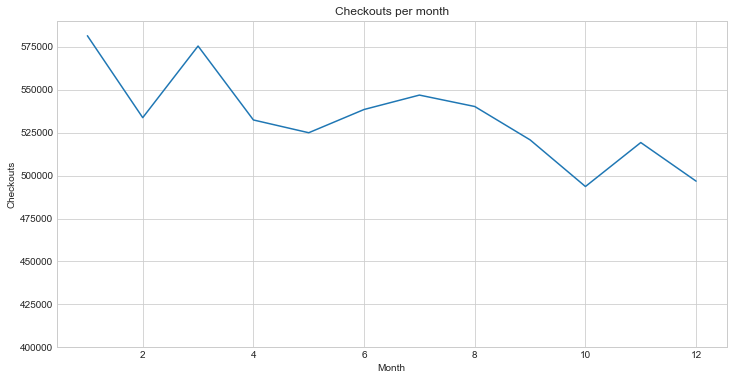

In [14]:
plt.figure(figsize=(12,6))
plt.title('Checkouts per month')
plt.xlabel('Month')
plt.ylabel('Checkouts')
plt.ylim([400000,590000])

plt.plot(byMonth.index, byMonth.values)
# plt.savefig('../../docs/images/checkoutsbymonth.png')

### Diagnostic Analysis
#### Why do the monthly checkouts behave the way they do?
Drilling down on the checkout counts by media type we can see that the media numbers are pretty consistent for the whole year but the print explains most of the fluctuations in total count month to month. This is clearly visible as the shape of total count takes the same shape as the month to month print fluctuations. Furthermore, in the summer we see that Fiction checkouts increase. This perspective perhaps reinforces the idea of a "beach reads" or "summer reads" boost as people check out books to read on vacation.

In [19]:
print(df.groupby(by=(['CheckoutMonth', 'Format Group']))['CheckoutDay'].count())

CheckoutMonth  Format Group
1              Media           224503
               Print           333406
2              Media           206856
               Print           306539
3              Media           224872
               Print           329837
4              Media           206281
               Print           308104
5              Media           201697
               Print           306827
6              Media           201096
               Print           321646
7              Media           202828
               Print           329343
8              Media           201488
               Print           325116
9              Media           196517
               Print           311474
10             Media           185768
               Print           296866
11             Media           196691
               Print           311726
12             Media           199749
               Print           287493
Name: CheckoutDay, dtype: int64


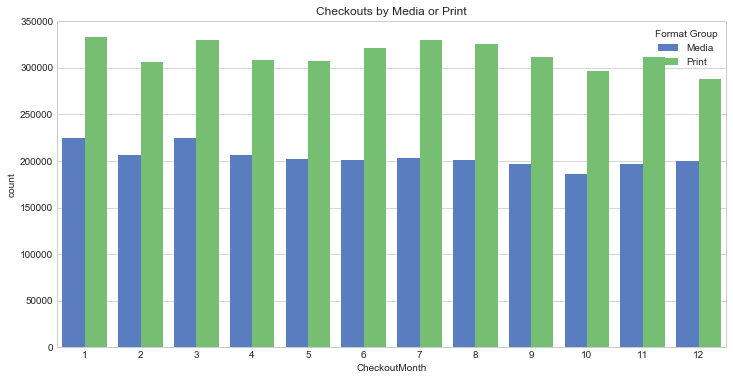

In [18]:
plt.figure(figsize=(12,6))
plt.title('Checkouts by Media or Print')
sns.countplot(x='CheckoutMonth', data=df, hue='Format Group', palette='muted')
# plt.savefig('../../docs/images/checkoutsbyformatgroup.png')

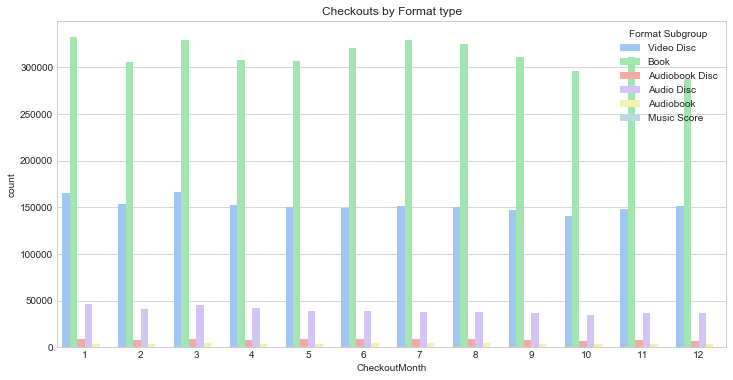

In [20]:
plt.figure(figsize=(12,6))
plt.title('Checkouts by Format type')
sns.countplot(x='CheckoutMonth', data=df, hue='Format Subgroup', palette='pastel')
# plt.savefig('../../docs/images/checkoutsbyformatsubgroup.png')

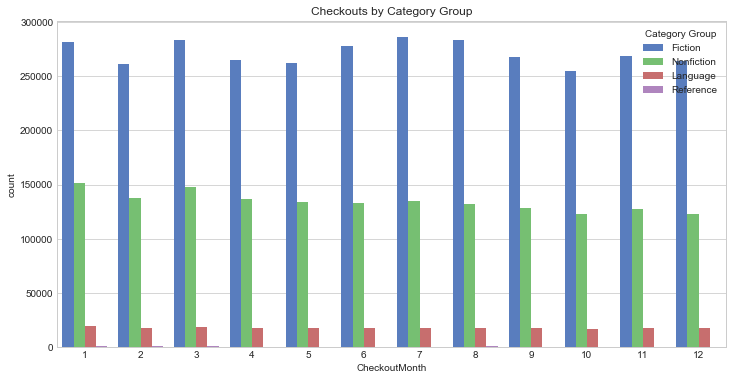

In [21]:
plt.figure(figsize=(12,6))
plt.title('Checkouts by Category Group')
sns.countplot(x='CheckoutMonth', data=df, hue='Category Group', palette='muted')
# plt.savefig('../../docs/images/checkoutsbycategory.png')

### What do checkouts look like by day of week?
#### Should the library change its hours or close on certain days based on usage?
Monday=0 and Sunday=6 in this numbering scheme. Clearly Friday and Sunday are the least popular days. Usage is steady during weekdays with only a 6.9% difference between the high and low. Friday, Saturday, and Sunday fluctuate greatly in comparison. The week's peak happens on Saturday with 1,100,314.

The peak on Saturday can be explained by people having more time to go to the library when they are off of work and school. People go out on Fridays and rest on Sundays which could explain the very low usage on those days. In addition, the library likely closes earlier on those days or some branches might be closed entirely.

CheckoutDay
0     989204
1    1006872
2     969021
3     937530
4     705531
5    1100314
6     696009
Name: CheckoutMonth, dtype: int64

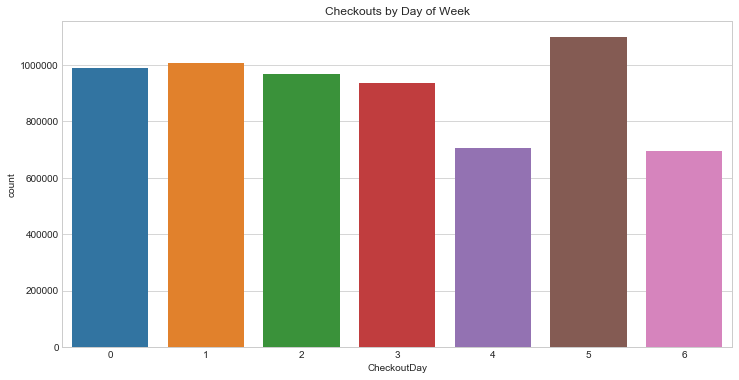

In [24]:
byDay = df.groupby('CheckoutDay')['CheckoutMonth'].count()

plt.figure(figsize=(12,6))
plt.title('Checkouts by Day of Week')
sns.countplot(x='CheckoutDay', data=df)
# plt.savefig('../../docs/images/checkoutsbydayofweek.png')
byDay

### Can the checkout trend for day of the week be explained in a similar way to months?
When looking at the format subgroups by day of the week we see that all the bars move together in the same way as general day of week chart. This means that the explanation for day of week trends is probably external and based more on user schedules instead of how those schedules affect their media consumption preferences.

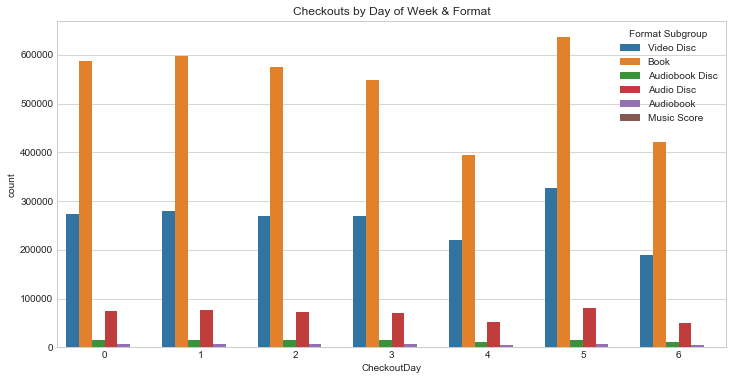

In [25]:
plt.figure(figsize=(12,6))
plt.title('Checkouts by Day of Week & Format')
sns.countplot(x='CheckoutDay', data=df, hue='Format Subgroup')
# plt.savefig('../../docs/images/checkoutsbydayofweekformat.png')

### What are the most circulated items in 2016?
It's quite jarring to see that the most circulated items by title are mostly DVDs. The top spot is actually occupied by a Wifi hotspot device. Filtering that out, we see only 3 books in the top 30.

In [86]:
df.groupby(by=['Title','Format Subgroup'])['CheckoutDay'].count().sort_values(ascending=False).reset_index()[1:31]

,Title,Format Subgroup,CheckoutDay
1,The Martian [videorecording] / Twentieth Centu...,Video Disc,4137
2,Bridge of spies [videorecording] / Touchstone ...,Video Disc,3741
3,The big short [videorecording] / Paramount Pic...,Video Disc,3577
4,Spotlight [videorecording] / directed by Tom M...,Video Disc,3358
5,Inside out [videorecording] / Disney ; Pixar A...,Video Disc,3329
6,SPECTRE [videorecording] / Metro Goldwyn Mayer...,Video Disc,3145
7,Brooklyn [videorecording] / Fox Searchlight Pi...,Video Disc,2978
8,Trainwreck [videorecording] / Universal Pictur...,Video Disc,2925
9,Jurassic world [videorecording] / Universal Pi...,Video Disc,2755
10,Mission: Impossible. Rogue nation [videorecord...,Video Disc,2705


### Most circulated books

In [53]:
print('20 most circulated books\n')
df[(df['Format Subgroup']=='Book') & (df['BibNum']!=3030520)]\
.groupby(by=['Title'])['CheckoutDay'].count().sort_values(ascending=False).reset_index()[:31]

20 most circulated books



,Title,CheckoutDay
0,The girl on the train / Paula Hawkins.,2676
1,Between the world and me / Ta-Nehisi Coates.,2414
2,When breath becomes air / Paul Kalanithi ; for...,2338
3,In Building Device Checkout,2285
4,Fates and furies / Lauren Groff.,2224
5,All the light we cannot see : a novel / Anthon...,2082
6,The life-changing magic of tidying up : the Ja...,1803
7,Being mortal : medicine and what matters in th...,1592
8,The nightingale / Kristin Hannah.,1592
9,My name is Lucy Barton : a novel / Elizabeth S...,1457


In [54]:
df.isnull().sum()

BibNum                    0
CheckoutDateTime          0
CheckoutMonth             0
CheckoutDay               0
deweySubject        4081881
Title                188108
Author              2231196
Publisher            190149
Age                  187758
Description          187758
Format Group         187758
Format Subgroup      187758
Category Group      1311689
Child                187758
Teen                 187758
dtype: int64

In [55]:
df.dropna(subset=['Description'], inplace=True)

In [56]:
df.isnull().sum()

BibNum                    0
CheckoutDateTime          0
CheckoutMonth             0
CheckoutDay               0
deweySubject        3966413
Title                   350
Author              2043438
Publisher              2391
Age                       0
Description               0
Format Group              0
Format Subgroup           0
Category Group      1123931
Child                     0
Teen                      0
dtype: int64

### Which nonfiction subjects should the library focus on when making new acquisitions?
#### What general nonfiction subjects circulate most?

The library has a mission to provide access to culture and make a wide variety of items available to the public but to meet demand they need to know what specific areas are most popular. From the analysis of subjects used in Dewey decimal classification it is clear that Arts and Recreation is the most popular followed by Technology.

#### Why is Arts & Recreation such a popular subject?

Looking more closely at the format type it is clear that CDs are artificially raising the total. Despite this, if we only look at the books by subject the picture is about the same. However, drilling down even deeper, if we filter only those books with the description NA-Nonfiction which refers to the main adult nonfiction collection, the picture is a little different. Mainly, technology is the most popular nonfiction book subject. It is an exercise worth doing to emphasize that you need a clear definition of something when you want to analyze it. From a business perspective, the lesson is important because if you don't understand the parameters of your data you risk coming to incorrect conclusions.

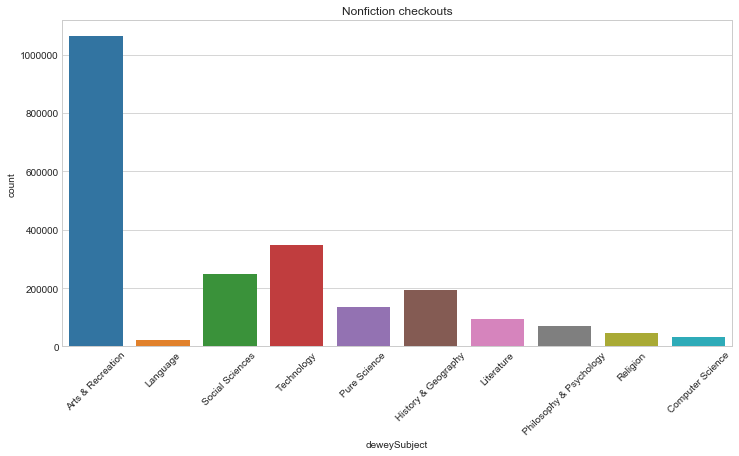

In [64]:
plt.figure(figsize=(12,6))
plt.title('Nonfiction checkouts')
plt.xticks(rotation=45)
sns.countplot(x='deweySubject', data=df)
# plt.savefig('../../docs/images/nonfictionbysubject.png')

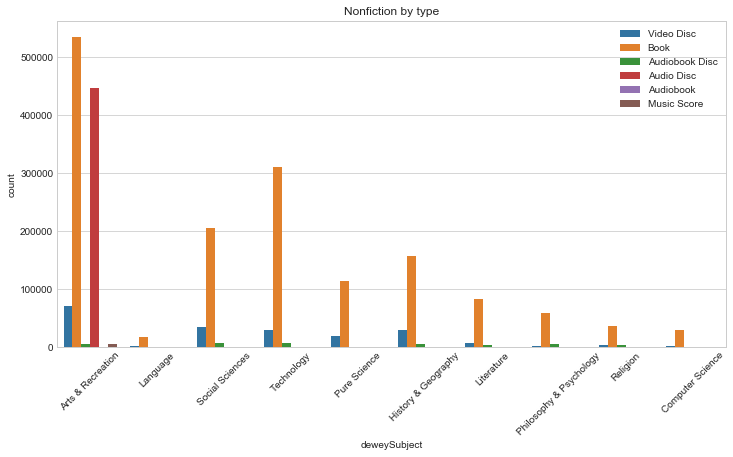

In [63]:
plt.figure(figsize=(12,6))
plt.title('Nonfiction by type')
plt.xticks(rotation=45)
ax = sns.countplot(x='deweySubject', data=df, hue='Format Subgroup')
ax.legend(loc='upper right', frameon=False)
# plt.savefig('../../docs/images/nonfictionbysubjectformat.png')

#### What is the most common type of nonfiction?

In [65]:
df[(df['deweySubject'].isnull()==False) & (df['Format Subgroup']=='Book')]['Description'].value_counts()[:5]

NA-Nonfiction                        569158
CA-Nonfiction                        291444
NC-Children's Comics                 149428
NC-Children's Nonfiction             129324
NY-Teen - Comics & Graphic Novels     88997
Name: Description, dtype: int64

#### Show adult nonfiction books only

In [66]:
df_dewey = df[(df['deweySubject'].isnull()==False) &(df['Description']=='NA-Nonfiction')]\
.groupby('deweySubject')['Format Group'].count().reset_index()
df_dewey

,deweySubject,Format Group
0,Arts & Recreation,94204
1,Computer Science,11805
2,History & Geography,79206
3,Language,8381
4,Literature,31391
5,Philosophy & Psychology,34784
6,Pure Science,20577
7,Religion,17336
8,Social Sciences,86029
9,Technology,185445


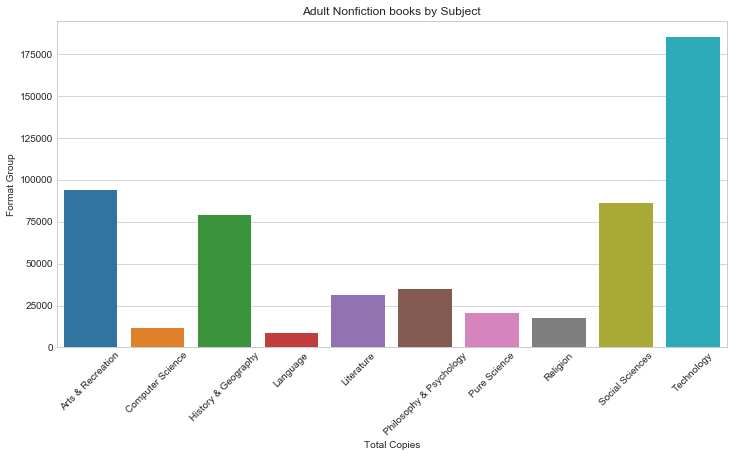

In [67]:
plt.figure(figsize=(12,6))
plt.title('Adult Nonfiction books by Subject')
plt.xticks(rotation=45)
ax = sns.barplot(x='deweySubject',y='Format Group',data=df_dewey)
ax.set_xlabel('Total Copies')
# plt.savefig('../../docs/images/adultnonfictionbooksbysubject.png')

### Multiple variables (Numeric x Numeric)
There aren't many numeric columns to work with but I expect to make some using one hot encoding for the different format types and subjects(non-fiction only).

From the correlation table we can see that the relationships between count and the available attributes are pretty weak. Age and whether or not an item is specifically for children are the strongest among them. It would make sense that the older an item is the less it is checked out based on cursory glances at the most popular items. Material for children is also a specific type of item that is checked out but high checkout count doesn't seem to be related strongly.

In [74]:
df_num = df.groupby(by=['BibNum','Title','Age','Child','Teen'])['CheckoutDay'].count().sort_values(ascending=False).reset_index()

In [76]:
df_num.rename(columns={'CheckoutDay':'Count'}, inplace=True)
df_num = df_num[(['Age','Child','Teen','Count'])]
df_num.corr()

,Age,Child,Teen,Count
Age,1.00,-0.07,-0.10,-0.12
Child,-0.07,1.00,-0.11,0.10
Teen,-0.10,-0.11,1.00,-0.03
Count,-0.12,0.10,-0.03,1.00


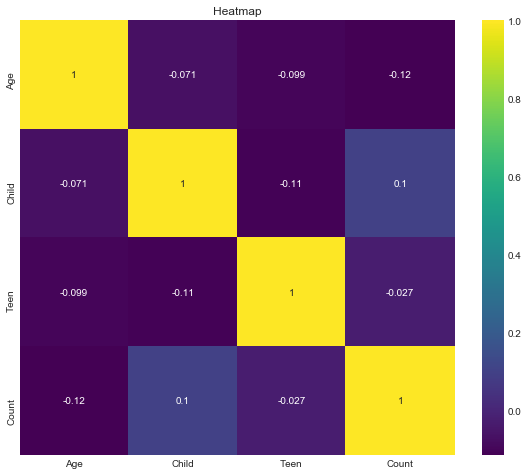

In [78]:
plt.figure(figsize=(10,8))
plt.title('Heatmap')
sns.heatmap(df_num.corr(),cmap='viridis',annot=True, square=True)
# plt.savefig('../../docs/images/numericheatmap.png')

### Investigating Age vs Checkout Count Further
It seems clear that the books that are checked out most frequently as we see the high checkout counts only along the bottom of the chart. As age goes up the counts tend to stick towards the low count total. 75% of the count total is from books from the last 8 years and almost a quarter of them are from the last 2 years! This seems to give the library a mandate to continue to acquire the latest materials. The only caveat might be that patrons check out new books because the library buys so many copies of new items and promotes them heavily. A library could show this to publishers and negotiate a deal to promote certain books. The ethics of this is another question entirely.

In [82]:
df['Age'].describe()

count   6216723.00
mean          6.44
std           7.69
min           0.00
25%           2.00
50%           4.00
75%           8.00
max         186.00
Name: Age, dtype: float64

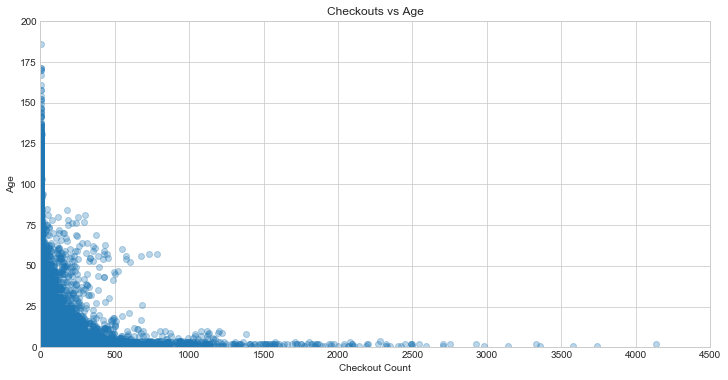

In [83]:
plt.figure(figsize=(12,6))
plt.title('Checkouts vs Age')
plt.xlabel('Checkout Count')
plt.ylabel('Age')
plt.ylim([0,200])
plt.xlim([0,4500])
plt.plot(df_num['Count'],df_num['Age'],'o',alpha=0.3)
# plt.savefig('../../docs/images/agevscheckouts.png')

### What does the age of items look like by format type?
We see that most checkouts are released within the same year for Books, DVDs and audiobooks. Audiodiscs are slightly older on average and music scores are in a category all on their own. The number of outliers for books is interesting and intuitive since print books have been around for so long.

A question the library must ask is how much new material should it buy since old material has to be removed to accomodate the new items. This could help guide the process as it indicates users strongly prefer checking out new items across all formats.

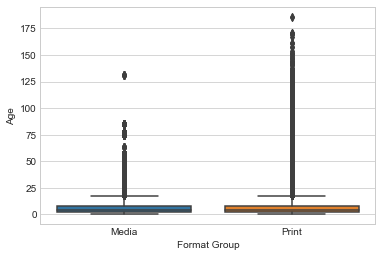

In [60]:
plt.figure(figsize=(12,6))
plt.title('Age distribution by Format')
# plt.xticks(rotation=90)
sns.boxplot(x='Format Group',y='Age', data=df)

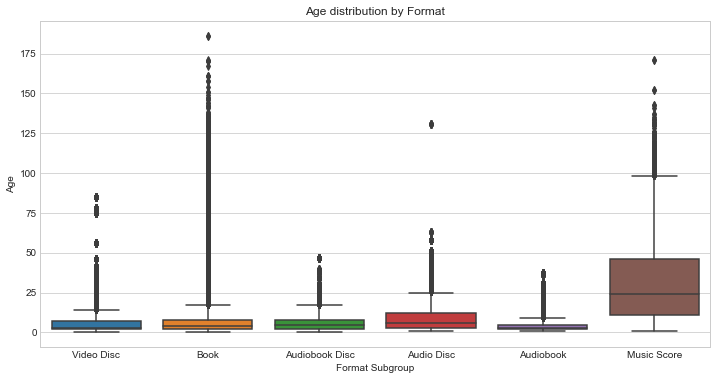

In [61]:
plt.figure(figsize=(12,6))
plt.title('Age distribution by Format')
# plt.xticks(rotation=90)
sns.boxplot(x='Format Subgroup',y='Age', data=df)